In [16]:
# All modules/libraries needed
import pandas as pd 
import hashlib as hl
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('Data/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [18]:
aus_data = df[df['NOC'] == 'AUS']
aus_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7638 entries, 274 to 269946
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      7638 non-null   int64  
 1   Name    7638 non-null   object 
 2   Sex     7638 non-null   object 
 3   Age     7527 non-null   float64
 4   Height  6739 non-null   float64
 5   Weight  6637 non-null   float64
 6   Team    7638 non-null   object 
 7   NOC     7638 non-null   object 
 8   Games   7638 non-null   object 
 9   Year    7638 non-null   int64  
 10  Season  7638 non-null   object 
 11  City    7638 non-null   object 
 12  Sport   7638 non-null   object 
 13  Event   7638 non-null   object 
 14  Medal   1320 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 954.8+ KB


In [19]:
annonymous_name = df['Name'].apply(lambda x: hl.sha256(x.encode()).hexdigest())

# Insert a new columns at index 1 on the table.
df.insert(1, "Annonymous Name", annonymous_name)
df.head(1)

,ID,Annonymous Name,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


#### Visualisera de sporter landet fått flest medaljer i

We will visualize:
- Top 5 sports with most medals
- All sports with more than 1000 medals

In [20]:
# Group the sports and count resp. medals on ecah sport
grouped_sport = df.groupby("Sport", observed=True)[["Medal"]]
medal_count = grouped_sport.count()
medal_count

,Medal
Sport,
Aeronautics,1
Alpine Skiing,428
Alpinism,25
Archery,353
Art Competitions,156
...,...
Tug-Of-War,115
Volleyball,969
Water Polo,1057


In [21]:
# Get top 5 sports with most medals
sorted_medals = medal_count.sort_values(["Medal"], ascending=False)
sorted_medals.head(5)

,Medal
Sport,
Athletics,3969
Swimming,3048
Rowing,2945
Gymnastics,2256
Fencing,1743


In [22]:
# I know that top 5 has 1700+ medals, therefore filtering all > 1700

top_5_sport = medal_count.loc[medal_count["Medal"] > 1700]
top_5_sport

,Medal
Sport,
Athletics,3969
Fencing,1743
Gymnastics,2256
Rowing,2945
Swimming,3048


In [23]:
medal_count_top_5 = top_5_sport["Medal"]
medal_count_top_5

Sport
Athletics     3969
Fencing       1743
Gymnastics    2256
Rowing        2945
Swimming      3048
Name: Medal, dtype: int64

In [24]:
# Get all sport with 1000 medals and aboce excluding the top 5 sports
filter_sport_above_1000_medals = medal_count[(medal_count["Medal"] < 1700) & (medal_count["Medal"] > 1000)]
sorted = filter_sport_above_1000_medals.sort_values(["Medal"], ascending=False)
sports = sorted

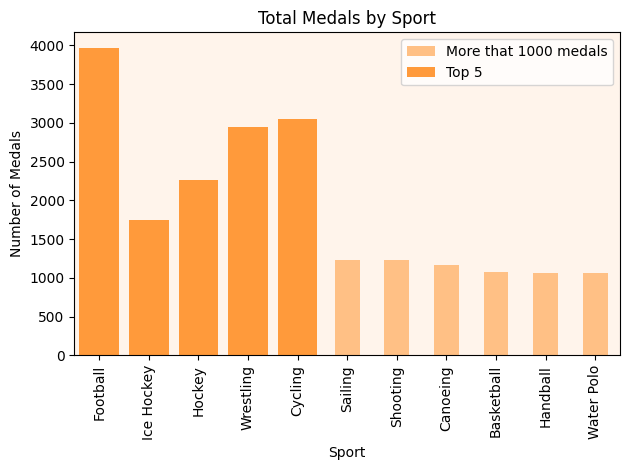

In [25]:
sports.plot(kind="bar", color="#FFC085")
plt.title("Total Medals by Sport")
plt.xlabel("Sport")
plt.ylabel("Number of Medals")

# Highlight the top 5 sport with the most medals
plt.bar(top_5_sport.index, medal_count_top_5, color="#FF9A3B")
# plt.gcf().set_facecolor("lightgray")
plt.gca().set_facecolor("#FFF4EB")
plt.legend(labels=["More that 1000 medals", "Top 5"])
plt.tight_layout()
plt.show()

#### Visualisera antal medaljer per OS

- There are some rows that has 'NaN' values and needs to process

In [26]:
df.info()

"""There are 371'116 rows and Medal has 39'782 rows that has a non-null value"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               271116 non-null  int64  
 1   Annonymous Name  271116 non-null  object 
 2   Name             271116 non-null  object 
 3   Sex              271116 non-null  object 
 4   Age              261642 non-null  float64
 5   Height           210945 non-null  float64
 6   Weight           208241 non-null  float64
 7   Team             271116 non-null  object 
 8   NOC              271116 non-null  object 
 9   Games            271116 non-null  object 
 10  Year             271116 non-null  int64  
 11  Season           271116 non-null  object 
 12  City             271116 non-null  object 
 13  Sport            271116 non-null  object 
 14  Event            271116 non-null  object 
 15  Medal            39783 non-null   object 
dtypes: float64(3), int64(2), object(11)
me

"There are 371'116 rows and Medal has 39'782 rows that has a non-null value"

In [27]:
# Filter to only get Medal that is NOT 'NaN'
medals_df = df[df["Medal"].notna()]
medals_df.info()

"""Now we got all 39'783 rows which has gotten a medal(s)"""

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               39783 non-null  int64  
 1   Annonymous Name  39783 non-null  object 
 2   Name             39783 non-null  object 
 3   Sex              39783 non-null  object 
 4   Age              39051 non-null  float64
 5   Height           31072 non-null  float64
 6   Weight           30456 non-null  float64
 7   Team             39783 non-null  object 
 8   NOC              39783 non-null  object 
 9   Games            39783 non-null  object 
 10  Year             39783 non-null  int64  
 11  Season           39783 non-null  object 
 12  City             39783 non-null  object 
 13  Sport            39783 non-null  object 
 14  Event            39783 non-null  object 
 15  Medal            39783 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 5.2+ MB


"Now we got all 39'783 rows which has gotten a medal(s)"

In [28]:
medals_per_os = medals_df.groupby(["Games", "Medal"]).size()
medals_per_os.head()

Games        Medal 
1896 Summer  Bronze     38
             Gold       62
             Silver     43
1900 Summer  Bronze    175
             Gold      201
dtype: int64

Source:
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html
- https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/

In [29]:
# unstack "Medal" index and convert it into columns
medals_per_os = medals_df.groupby(["Games", "Medal"]).size().unstack(level=1) # level 0 = "Games", level 1 = "Medal"
medals_per_os.head()

Medal,Bronze,Gold,Silver
Games,,,
1896 Summer,38,62,43
1900 Summer,175,201,228
1904 Summer,150,173,163
1906 Summer,145,157,156
1908 Summer,256,294,281


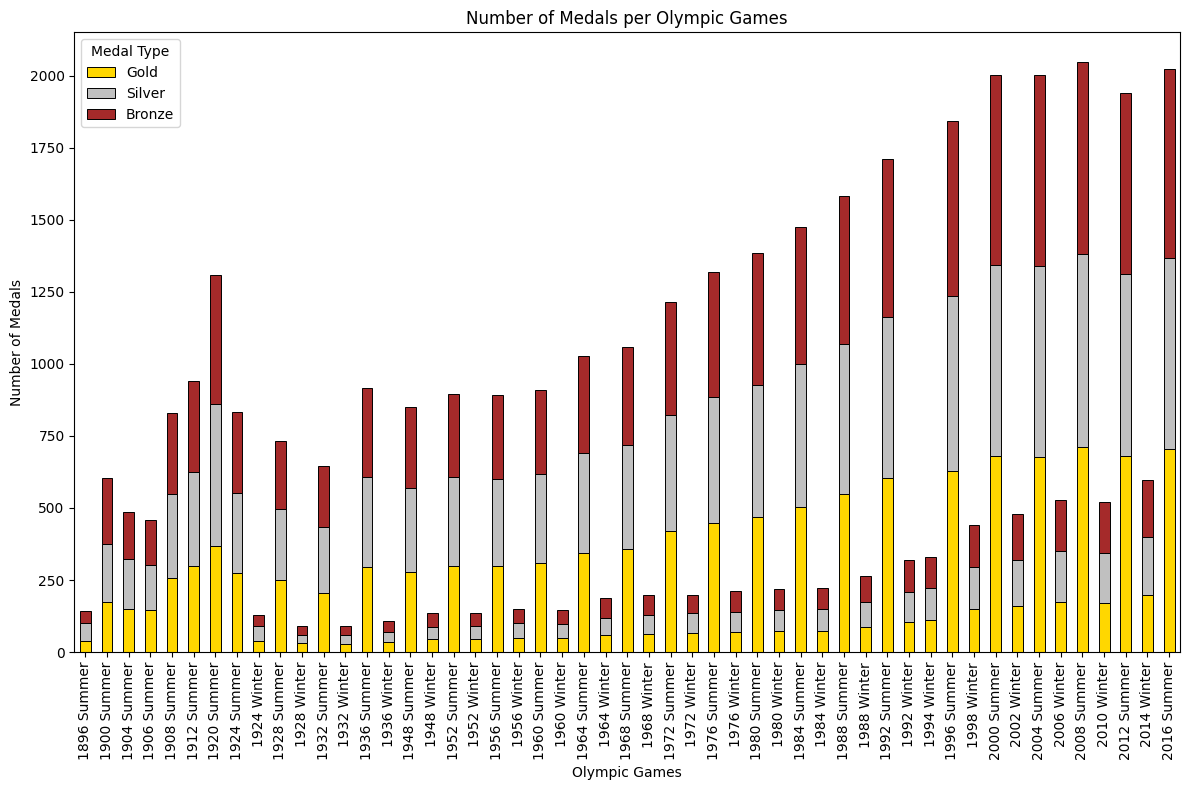

In [30]:
medals_per_os.plot(kind="bar", stacked=True, figsize=(12, 8), color=["gold", "silver", "brown"], edgecolor="black", linewidth=0.7)

plt.title("Number of Medals per Olympic Games")
plt.xlabel("Olympic Games")
plt.ylabel("Number of Medals")
plt.legend(title="Medal Type", labels=["Gold", "Silver", "Bronze"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()